In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [83]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
import chardet

#Funcion para predecir el encoding de un archivo:
def predict_encoding(file_path, n_lines=20):
        with open(file_path, 'rb') as f:
            rawdata = b''.join([f.readline() for _ in range(n_lines)])
            return chardet.detect(rawdata)['encoding'] 

In [6]:
predict_encoding('Sample Data_Driving Behavior2.xls')

'Windows-1254'

In [12]:
data=pd.read_csv('Sample_Driving.csv')
data.head()

,Device ID,events,Harsh Acceleration event,Harsh Branking event,Over Speed event,Usage Anual Range
0,867162025148577,109,75,34,0,0 a 12k
1,867162025148578,90,23,21,46,25 a +40k
2,867162025482589,34,27,5,2,12 a 25k
3,867162025483033,58,48,2,8,25 a +40k
4,867162025484775,27,27,0,0,0 a 12k


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14085 entries, 0 to 14084
Data columns (total 6 columns):
Device ID                   14085 non-null int64
events                      14085 non-null int64
Harsh Acceleration event    14085 non-null int64
Harsh Branking event        14085 non-null int64
Over Speed event            14085 non-null int64
Usage Anual Range           14085 non-null object
dtypes: int64(5), object(1)
memory usage: 660.4+ KB


In [14]:
#Check ID duplicated
data['Device ID'].duplicated().sum()

0

In [15]:
data.rename(columns=lambda x: x.replace(' ','_').lower(),inplace=True)
data.columns

Index(['device_id', 'events', 'harsh_acceleration_event',
       'harsh_branking_event', 'over_speed_event', 'usage_anual_range'],
      dtype='object')

In [18]:
#rename for easier acces
data.columns=['device_id', 'events', 'harsh_acc',
       'harsh_brak', 'over_speed', 'usage']
data.head()

,device_id,events,harsh_acc,harsh_brak,over_speed,usage
0,867162025148577,109,75,34,0,0 a 12k
1,867162025148578,90,23,21,46,25 a +40k
2,867162025482589,34,27,5,2,12 a 25k
3,867162025483033,58,48,2,8,25 a +40k
4,867162025484775,27,27,0,0,0 a 12k


In [20]:
data.groupby(['usage']).mean().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
usage,,,,,
0 a 12k,8.671620e+14,201.97,101.57,94.48,5.93
12 a 25k,8.671620e+14,336.90,165.47,160.39,11.04
25 a +40k,8.671620e+14,617.31,269.63,321.10,26.57


/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


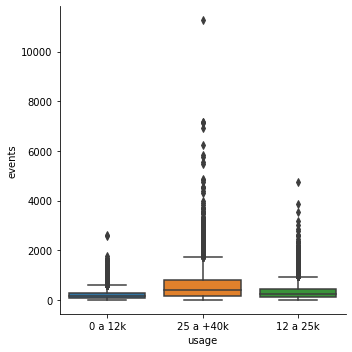

In [21]:
g=sns.factorplot('usage','events',data=data,kind='box')

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


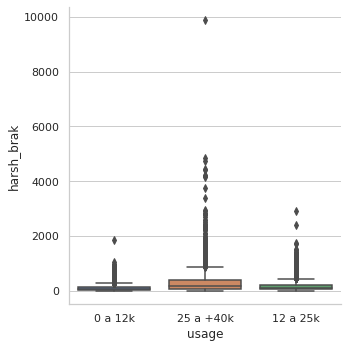

In [86]:
g=sns.factorplot('usage','harsh_brak',data=data,kind='box')

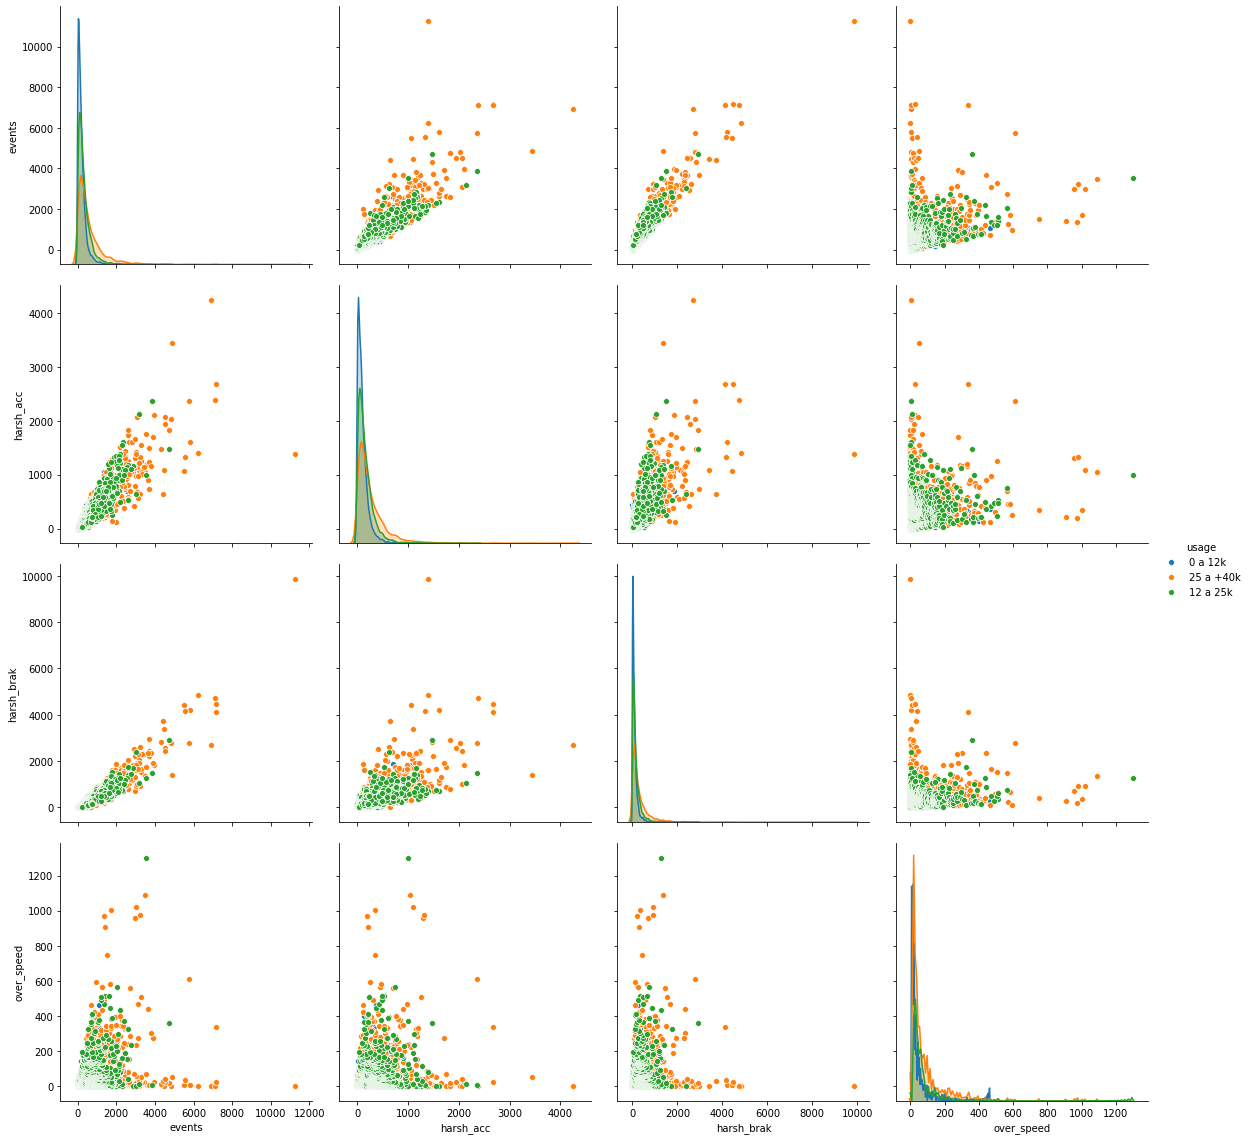

In [27]:
data_pair=data[['usage','events','harsh_acc','harsh_brak','over_speed']]
sns.pairplot(data_pair,hue='usage',height=4)

In [28]:
#OneHotEncoding

data_rf=pd.get_dummies(data_pair,columns=['usage'],drop_first=True)
data_rf.head()

,events,harsh_acc,harsh_brak,over_speed,usage_12 a 25k,usage_25 a +40k
0,109,75,34,0,0,0
1,90,23,21,46,0,1
2,34,27,5,2,1,0
3,58,48,2,8,0,1
4,27,27,0,0,0,0


In [29]:
#label as variable to predict
labels=np.array(data_rf['events'])

#features without variable 'y'
features=data_rf.drop('events',axis=1)

#saving features names
features_list=list(features.columns)

#convert to np array
features=np.array(features)


In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.25,random_state=42)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (10563, 5)
y_train: (10563,)
X_test: (3522, 5)
y_test: (3522,)


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [69]:
rf.feature_importances_

array([1.56751444e-01, 8.32731022e-01, 1.03005806e-02, 1.20800437e-04,
       9.61527605e-05])

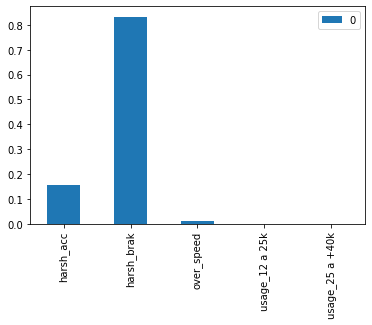

In [78]:
pd.DataFrame(rf.feature_importances_,index=features_list).plot(kind='bar')

In [79]:
data.sum()

device_id                                  12213977144501762301
events                                                  4868093
harsh_acc                                               2307611
harsh_brak                                              2386389
over_speed                                               174093
usage         0 a 12k25 a +40k12 a 25k25 a +40k0 a 12k25 a +...
dtype: object

In [64]:
from sklearn.tree import export_graphviz
import pydot

In [67]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(max_depth = 3)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = features_list, rounded = True,
                precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

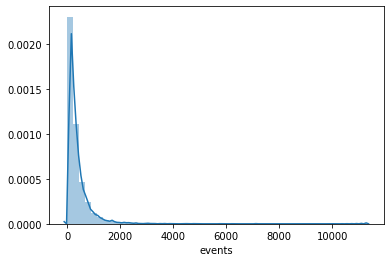

In [82]:
sns.distplot(data.events,bins=50)

In [ ]:
sns.distplot(data.events,bins=50)

# CLUSTER:

In [87]:
data_clus=data[['usage','harsh_acc','harsh_brak','over_speed']]

In [89]:
#Creando OneHot Encoding for categorical data
data_cluster=pd.get_dummies(data_clus,columns=['usage'],drop_first=True)
data_cluster.head()

,harsh_acc,harsh_brak,over_speed,usage_12 a 25k,usage_25 a +40k
0,75,34,0,0,0
1,23,21,46,0,1
2,27,5,2,1,0
3,48,2,8,0,1
4,27,0,0,0,0


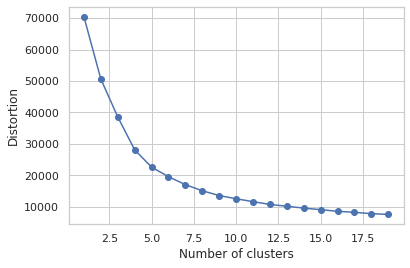

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

base_scaled=StandardScaler().fit_transform(data_cluster)

distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42
    )
    km.fit(base_scaled)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [100]:
from sklearn.cluster import KMeans

km = KMeans(
        n_clusters=10, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.01, random_state=42)

km.fit(base_scaled)
data_clus['clusters']=km.labels_

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [101]:
data_clus.head()

,usage,harsh_acc,harsh_brak,over_speed,clusters
0,0 a 12k,75,34,0,0
1,25 a +40k,23,21,46,3
2,12 a 25k,27,5,2,1
3,25 a +40k,48,2,8,3
4,0 a 12k,27,0,0,0


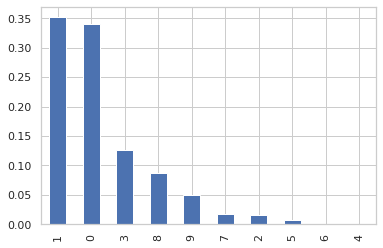

In [102]:
data_clus.clusters.value_counts(normalize=True).plot(kind='bar')

In [103]:
data_clus.groupby(['clusters']).mean()

,harsh_acc,harsh_brak,over_speed
clusters,,,
0,89.590294,81.714226,3.435534
1,104.841712,94.752675,4.385625
2,933.547085,1201.623318,29.650224
3,118.065657,116.191358,7.497755
4,763.444444,711.000000,997.555556
5,535.824074,695.750000,336.592593
6,1952.789474,3747.947368,82.315789
7,305.582329,318.349398,155.236948
8,381.161812,396.851942,14.533172


In [104]:
data_clus.groupby(['clusters','usage']).mean()

harsh_acc   harsh_brak   over_speed
clusters usage                                           
0        0 a 12k      89.590294    81.714226     3.435534
1        12 a 25k    104.841712    94.752675     4.385625
2        0 a 12k     853.625000   988.000000     7.625000
         12 a 25k   1142.885714  1035.400000    40.114286
         25 a +40k   896.394444  1243.438889    28.594444
3        25 a +40k   118.065657   116.191358     7.497755
4        12 a 25k    999.000000  1252.000000  1302.000000
         25 a +40k   734.000000   643.375000   959.500000
5        0 a 12k     344.400000   381.000000   363.800000
         12 a 25k    489.750000   586.214286   374.142857
         25 a +40k   565.786667   757.626667   320.760000
6        12 a 25k   1472.000000  2899.000000   359.000000
         25 a +40k  1979.500000  3795.111111    66.944444
7        0 a 12k     304.571429   306.785714   137.028571
         12 a 25k    327.504505   320.171171   157.972973
         25 a +40k   270.838235   327.279412   169.514706
8        0 a 12k     465.757576   476.565657    15.868687
         12 a 25k    373.795954   389.911170    14.416887
9        25 a +40k   412.175887   464.148936    17.578723

# Opcion 2:


In [105]:
data.head()

,device_id,events,harsh_acc,harsh_brak,over_speed,usage
0,867162025148577,109,75,34,0,0 a 12k
1,867162025148578,90,23,21,46,25 a +40k
2,867162025482589,34,27,5,2,12 a 25k
3,867162025483033,58,48,2,8,25 a +40k
4,867162025484775,27,27,0,0,0 a 12k


In [109]:
data.groupby(['usage']).device_id.count()

usage
0 a 12k      4983
12 a 25k     6266
25 a +40k    2836
Name: device_id, dtype: int64

In [110]:
uso1=data[data['usage']=='0 a 12k']
uso2=data[data['usage']=='12 a 25k']
uso3=data[data['usage']=='25 a +40k']

In [119]:
print('Uso medio en Km por año de cada grupo')
print('uso 1:',12/2)
print('uso 2:',(25+12)/2, 'vs 1:',round(((25+12)/2)/6),2)
print('uso 3:',(40+25)/2, 'vs 1:', round(((40+25)/2)/6,2))

Uso medio en Km por año de cada grupo
uso 1: 6.0
uso 2: 18.5 vs 1: 3 2
uso 3: 32.5 vs 1: 5.42


Por la distribución probablemente el punto medio de 0 a 12, esté entre 8 y 10 KM, y el de 25 a +40 en algun valor mucho mas cercano a 25. Por lo que los factores de la base frecuencial deberían ser revisados para lograr tener informacion más precisa

## Grupo 1: 0-12Km

In [121]:
uso1.describe().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
count,4.983000e+03,4983.00,4983.00,4983.00,4983.00
mean,8.671620e+14,201.97,101.57,94.48,5.93
std,8.213394e+05,214.84,106.18,113.60,22.97
min,8.671620e+14,0.00,0.00,0.00,0.00
25%,8.671620e+14,59.00,29.00,24.00,0.00
50%,8.671620e+14,142.00,73.00,59.00,0.00
75%,8.671620e+14,269.00,138.50,122.00,1.00
max,8.671620e+14,2628.00,1759.00,1866.00,465.00


Text(0.5, 1.0, 'Overspeed')

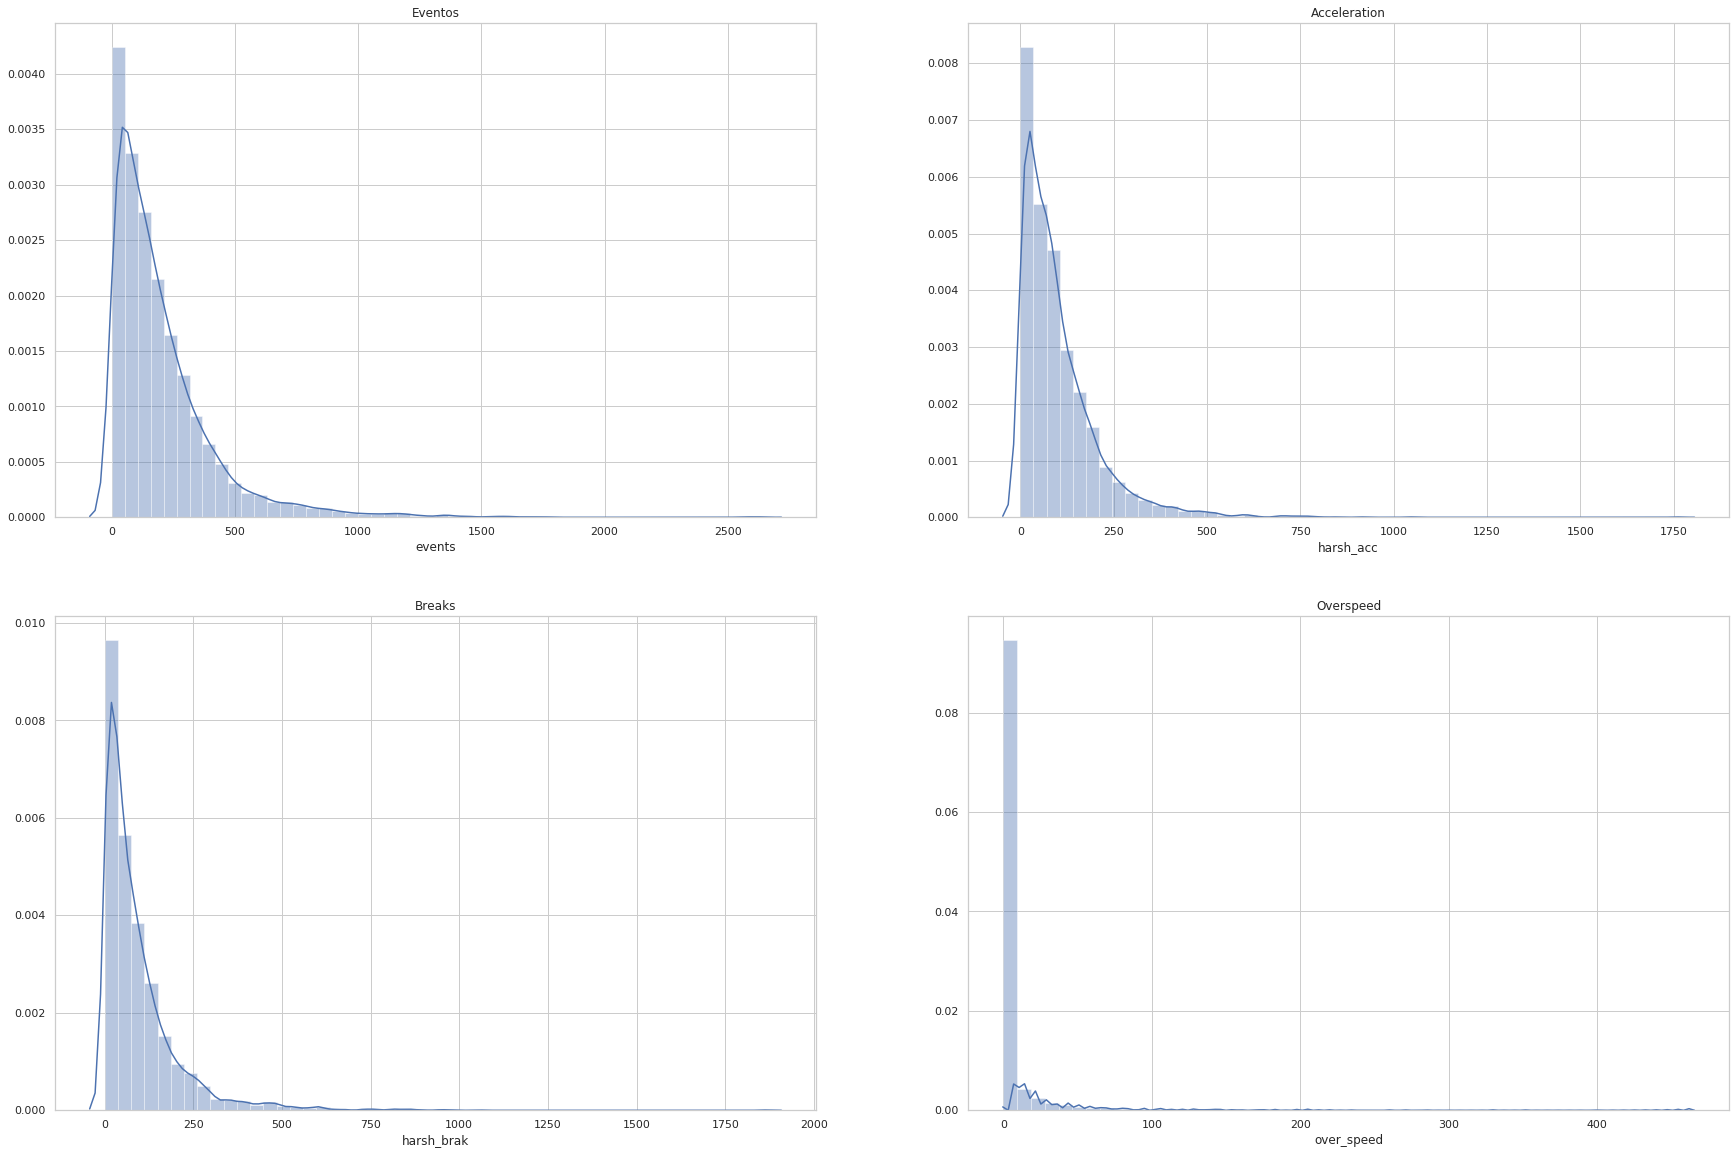

In [131]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(uso1.events, ax=ax[0,0]);
ax[0,0].set_title('Eventos')

sns.distplot(uso1.harsh_acc, ax=ax[0,1]);
ax[0,1].set_title('Acceleration')

sns.distplot(uso1.harsh_brak, ax=ax[1,0]);
ax[1,0].set_title('Breaks')

sns.distplot(uso1.over_speed, ax=ax[1,1]);
ax[1,1].set_title('Overspeed')

In [ ]:
uso1_clus=uso1[['harsh_acc','harsh_brak','over_speed']]

In [134]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


uso1_clus=uso1[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(uso1_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  9.6min finished


{'init': 'random', 'n_clusters': 9, 'n_init': 100, 'tol': 0.0001}

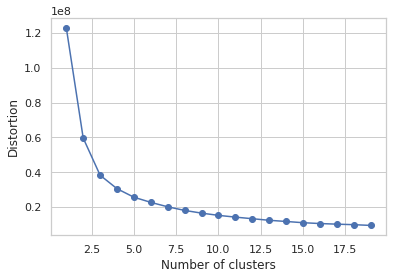

In [135]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='random',
        n_init=100, max_iter=300,
        tol=0.0001, random_state=42
    )
    km.fit(uso1_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


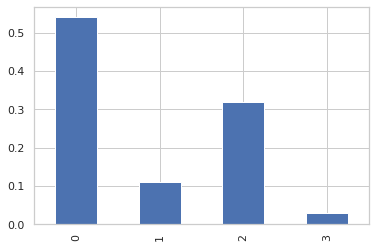

In [159]:
km = KMeans(
        n_clusters=4, init='random',
        n_init=100, max_iter=300,
        tol=0.0001, random_state=42)

km.fit(uso1_clus)
uso1['cluster']=km.labels_
uso1.cluster.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [166]:
uso1.groupby(['cluster'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster                                                          
0       count  2691.000000  2691.000000  2691.000000  2691.000000
        mean     70.180230    37.600520    31.034188     1.545522
        std      46.324873    27.432117    24.072033     7.618584
        min       0.000000     0.000000     0.000000     0.000000
        25%      31.000000    14.000000    12.000000     0.000000
        50%      65.000000    33.000000    26.000000     0.000000
        75%     108.000000    58.000000    45.000000     0.000000
        max     302.000000   118.000000   129.000000   167.000000
1       count   542.000000   542.000000   542.000000   542.000000
        mean    512.911439   250.542435   245.221402    17.147601
        std     114.899633    84.561766    82.602465    43.474177
        min     360.000000    51.000000     2.000000     0.000000
        25%     421.000000   191.250000   186.250000     0.000000
        50%     477.000000   241.500000   238.500000     1.000000
        75%     586.500000   296.000000   287.750000    13.000000
        max    1087.000000   549.000000   566.000000   465.000000
2       count  1614.000000  1614.000000  1614.000000  1614.000000
        mean    246.513631   127.725527   112.277571     6.510533
        std      63.856634    44.387918    44.292059    19.481139
        min     152.000000    22.000000     8.000000     0.000000
        25%     192.000000    95.000000    79.250000     0.000000
        50%     235.500000   122.000000   106.500000     0.000000
        75%     292.750000   157.000000   140.000000     3.000000
        max     589.000000   277.000000   270.000000   284.000000
3       count   136.000000   136.000000   136.000000   136.000000
        mean   1041.830882   463.073529   537.757353    41.000000
        std     300.314491   195.819707   201.761373    63.795391
        min     711.000000   123.000000   230.000000     0.000000
        25%     841.750000   345.250000   406.000000     0.000000
        50%     952.000000   424.500000   496.000000    10.000000
        75%    1162.500000   529.000000   603.000000    50.250000
        max    2628.000000  1759.000000  1866.000000   329.000000

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


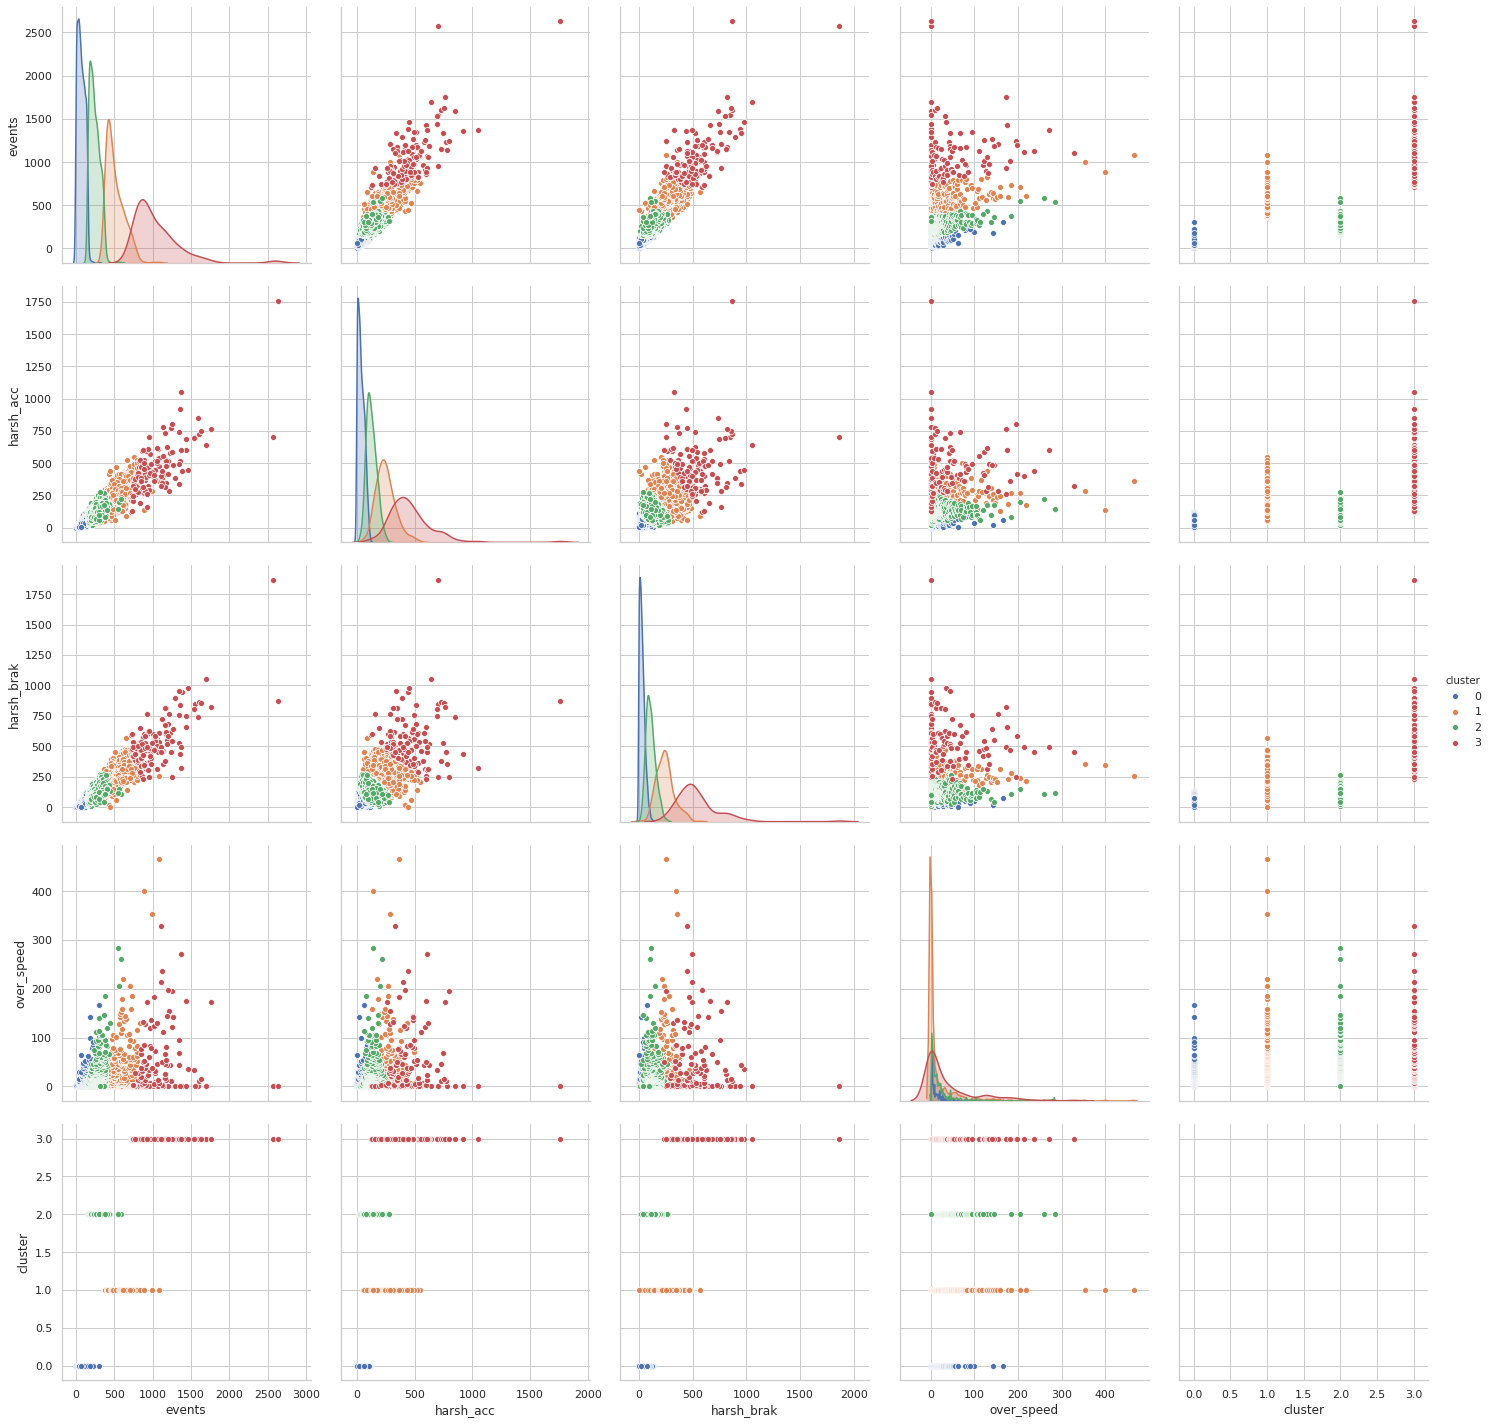

In [167]:
sns.pairplot(uso1[['events','harsh_acc','harsh_brak','over_speed','cluster']],hue='cluster',height=4)

## Grupo 2: 12-25Km

In [162]:
uso2.describe().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
count,6.266000e+03,6266.00,6266.00,6266.00,6266.00
mean,8.671620e+14,336.90,165.47,160.39,11.04
std,8.259064e+05,339.89,164.53,182.73,39.91
min,8.671620e+14,0.00,0.00,0.00,0.00
25%,8.671620e+14,116.00,57.00,47.00,0.00
50%,8.671620e+14,238.50,121.00,103.00,0.00
75%,8.671620e+14,445.00,223.00,207.00,4.00
max,8.671620e+14,4730.00,2358.00,2899.00,1302.00


Text(0.5, 1.0, 'Overspeed')

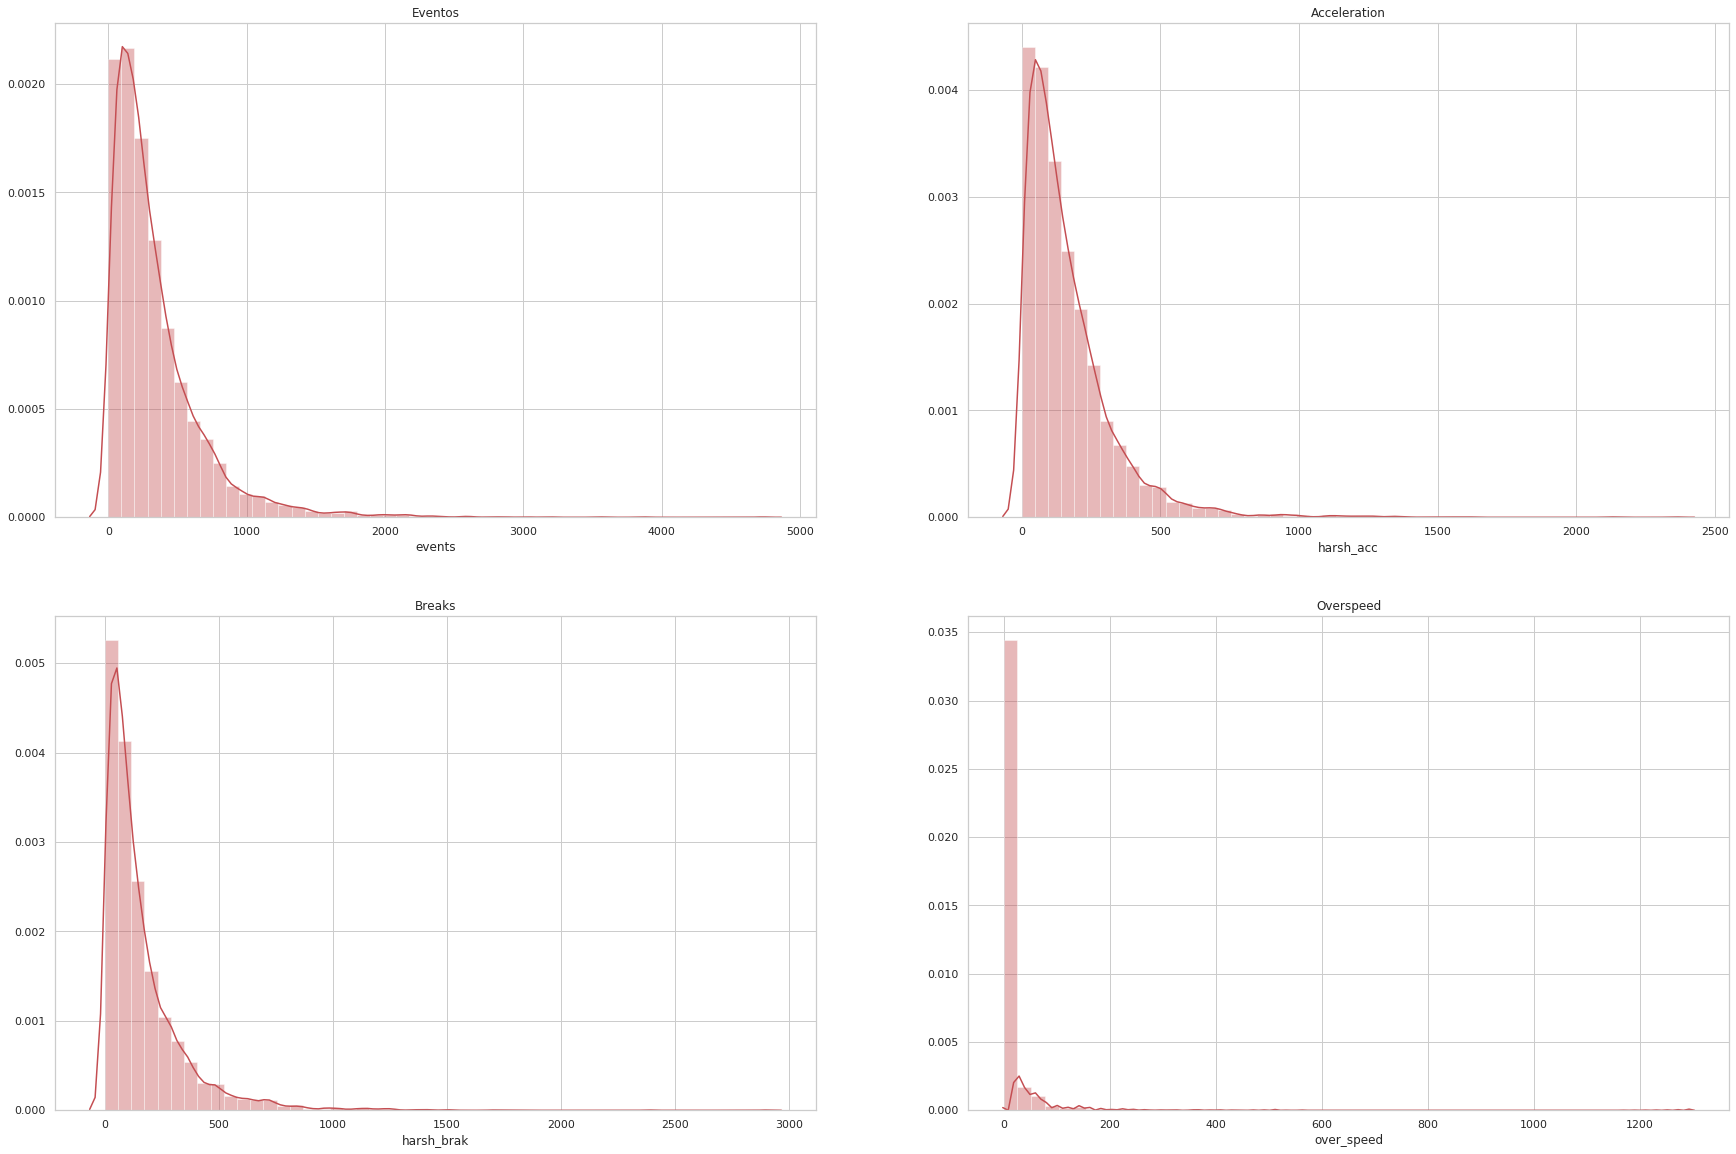

In [163]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(uso2.events, ax=ax[0,0],color='r');
ax[0,0].set_title('Eventos')

sns.distplot(uso2.harsh_acc, ax=ax[0,1],color='r');
ax[0,1].set_title('Acceleration')

sns.distplot(uso2.harsh_brak, ax=ax[1,0],color='r');
ax[1,0].set_title('Breaks')

sns.distplot(uso2.over_speed, ax=ax[1,1],color='r');
ax[1,1].set_title('Overspeed')

In [146]:
parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


uso2_clus=uso2[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(uso2_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 10.9min finished


{'init': 'k-means++', 'n_clusters': 9, 'n_init': 10, 'tol': 0.01}

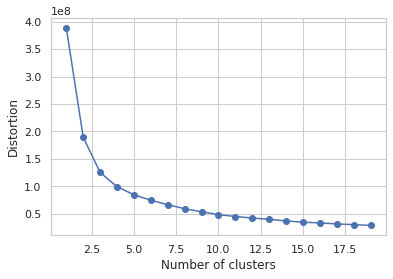

In [148]:
distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.01, random_state=42
    )
    km.fit(uso2_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


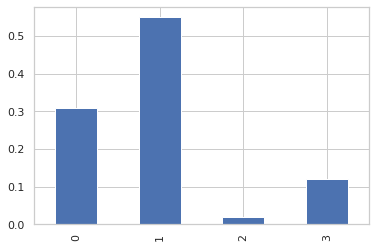

In [164]:
km = KMeans(
        n_clusters=4, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.01, random_state=42)

km.fit(uso2_clus)
uso2['cluster']=km.labels_
uso2.cluster.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [168]:
uso2.groupby(['cluster'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster                                                          
0       count  1945.000000  1945.000000  1945.000000  1945.000000
        mean    408.613882   209.232905   187.415424    11.965553
        std     102.241240    72.579216    72.198053    33.931627
        min     256.000000    40.000000    12.000000     0.000000
        25%     324.000000   160.000000   134.000000     0.000000
        50%     390.000000   202.000000   177.000000     1.000000
        75%     481.000000   254.000000   233.000000     8.000000
        max     827.000000   519.000000   435.000000   413.000000
1       count  3437.000000  3437.000000  3437.000000  3437.000000
        mean    131.163224    68.719523    58.345650     4.098051
        std      76.346572    44.952962    40.229433    15.907785
        min       0.000000     0.000000     0.000000     0.000000
        25%      68.000000    32.000000    26.000000     0.000000
        50%     127.000000    63.000000    52.000000     0.000000
        75%     193.000000   100.000000    83.000000     1.000000
        max     550.000000   240.000000   239.000000   323.000000
2       count   146.000000   146.000000   146.000000   146.000000
        mean   1730.801370   763.589041   896.952055    70.260274
        std     526.168973   336.311507   331.975598   144.641104
        min    1214.000000   252.000000   375.000000     0.000000
        25%    1374.250000   531.500000   701.500000     1.000000
        50%    1584.500000   678.000000   823.000000    18.000000
        75%    1941.500000   935.750000  1033.250000    72.250000
        max    4730.000000  2358.000000  2899.000000  1302.000000
3       count   738.000000   738.000000   738.000000   738.000000
        mean    830.268293   382.376694   418.658537    29.233062
        std     182.200357   133.590147   126.931963    62.864459
        min     559.000000    32.000000   165.000000     0.000000
        25%     688.000000   291.000000   325.000000     0.000000
        50%     779.500000   368.500000   394.000000     4.000000
        75%     943.500000   466.000000   491.000000    29.750000
        max    1622.000000   878.000000   854.000000   514.000000

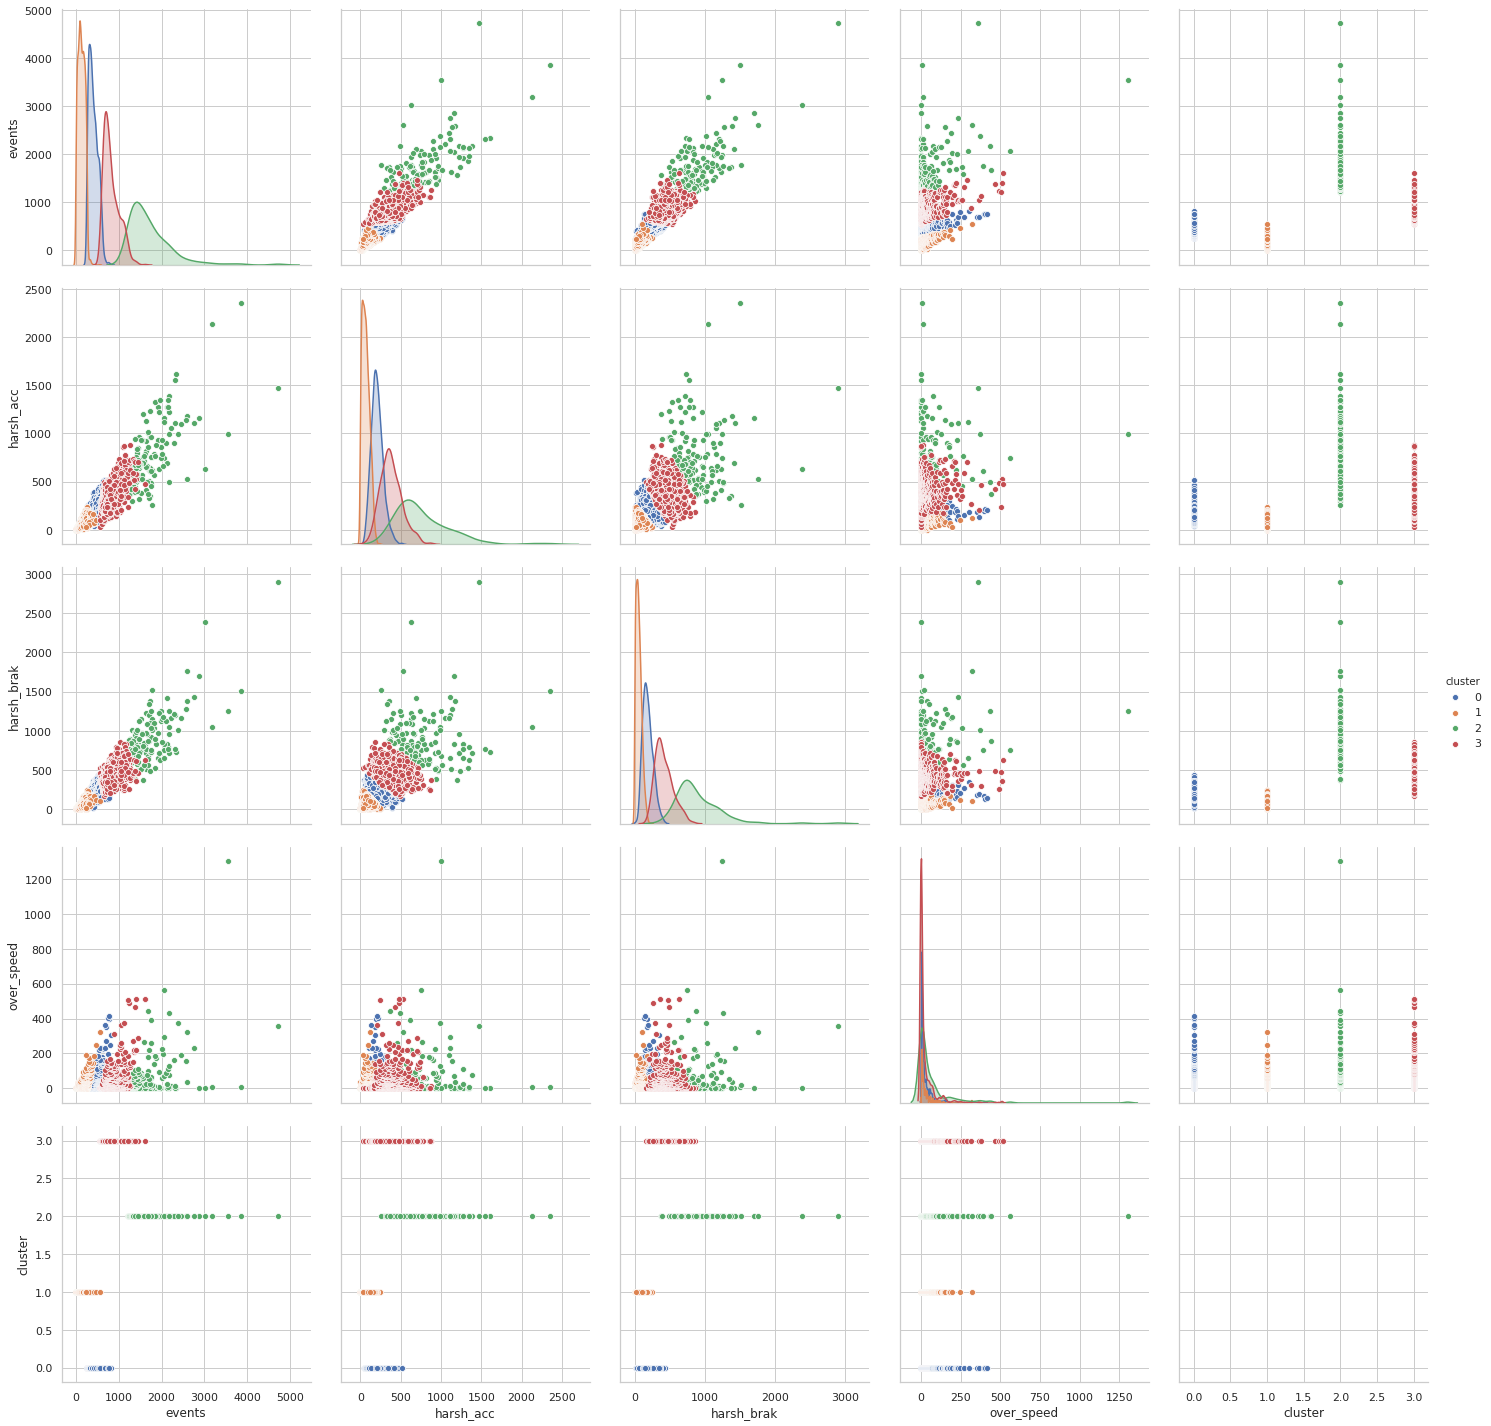

In [169]:
sns.pairplot(uso2[['events','harsh_acc','harsh_brak','over_speed','cluster']],hue='cluster',height=4)

## Grupo 3: 25 - +40Km:

In [170]:
uso3.describe().round(2)

,device_id,events,harsh_acc,harsh_brak,over_speed
count,2.836000e+03,2836.00,2836.00,2836.00,2836.00
mean,8.671620e+14,617.31,269.63,321.10,26.57
std,8.168323e+05,746.39,302.31,473.85,80.55
min,8.671620e+14,0.00,0.00,0.00,0.00
25%,8.671620e+14,173.75,82.00,72.00,0.00
50%,8.671620e+14,398.00,179.00,174.00,1.00
75%,8.671620e+14,788.00,360.00,394.00,15.00
max,8.671620e+14,11259.00,4240.00,9872.00,1090.00


Text(0.5, 1.0, 'Overspeed')

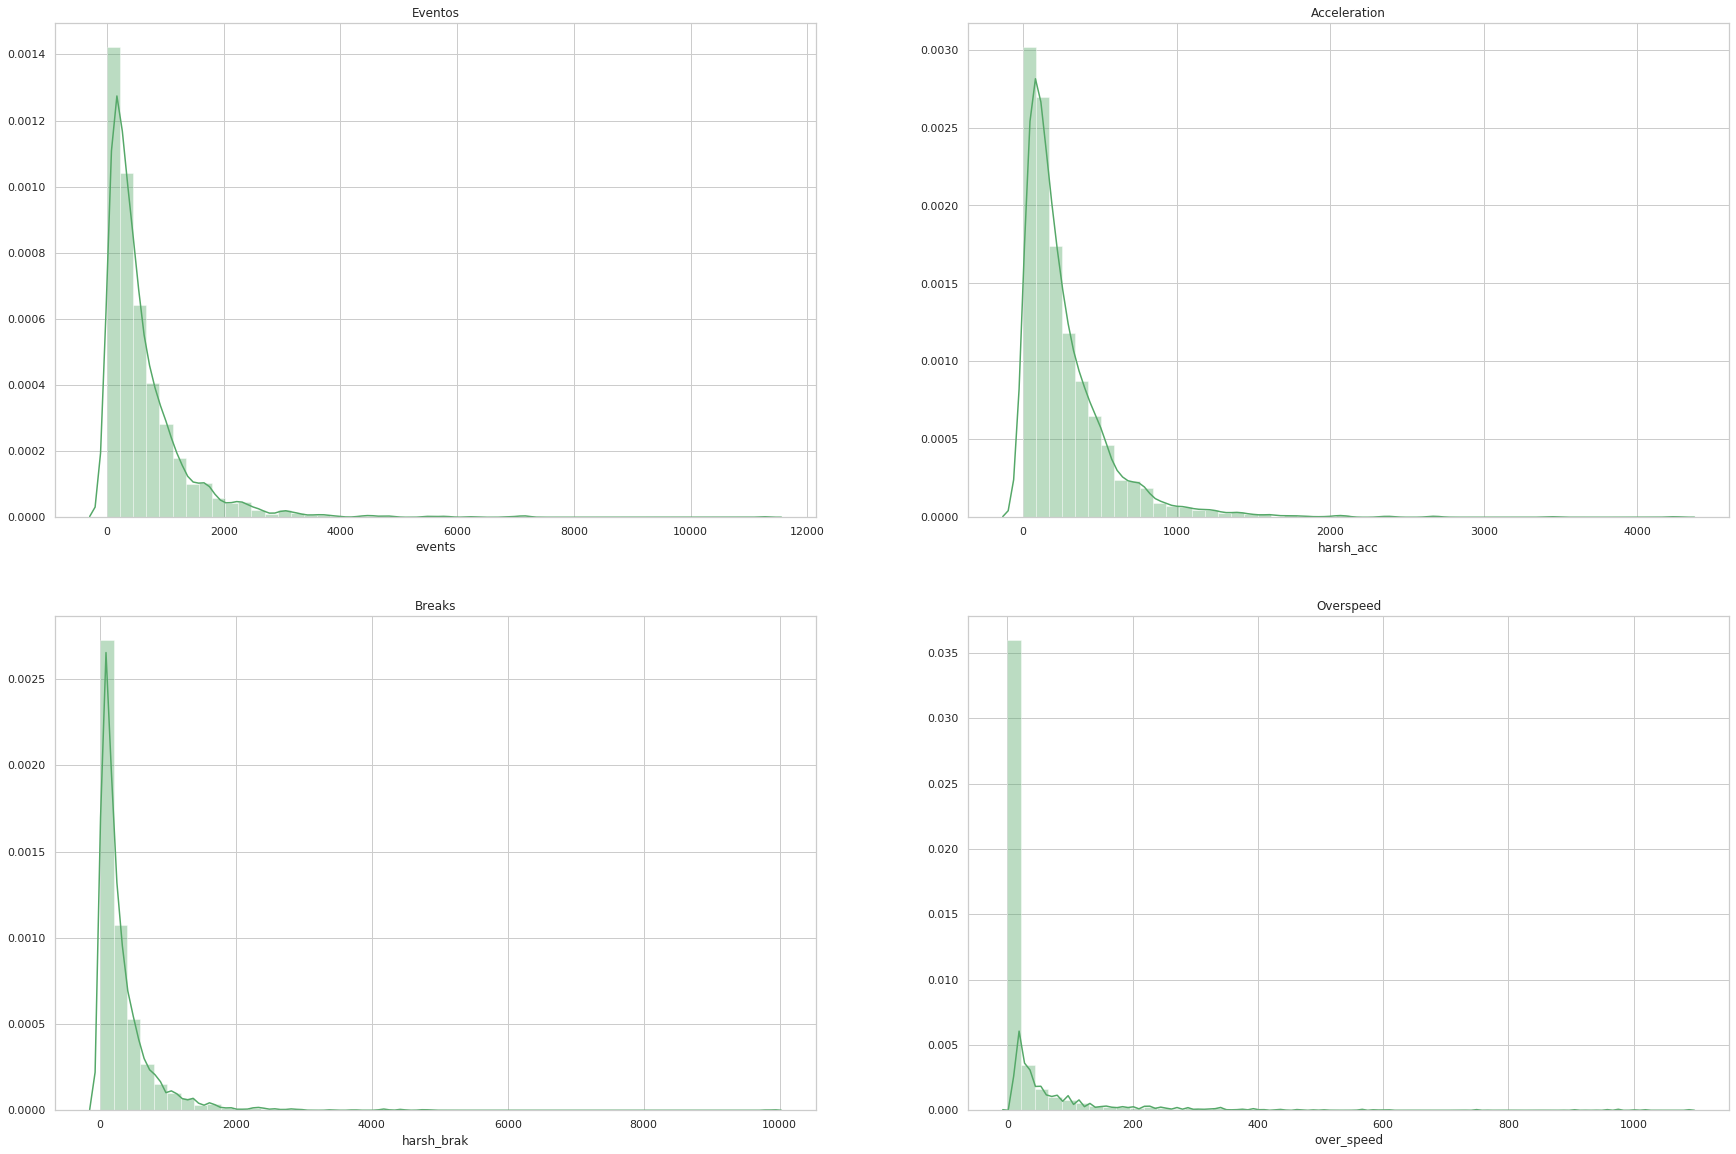

In [171]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(uso3.events, ax=ax[0,0],color='g');
ax[0,0].set_title('Eventos')

sns.distplot(uso3.harsh_acc, ax=ax[0,1],color='g');
ax[0,1].set_title('Acceleration')

sns.distplot(uso3.harsh_brak, ax=ax[1,0],color='g');
ax[1,0].set_title('Breaks')

sns.distplot(uso3.over_speed, ax=ax[1,1],color='g');
ax[1,1].set_title('Overspeed')

In [172]:
parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


uso3_clus=uso3[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(uso3_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  4.8min finished


{'init': 'random', 'n_clusters': 9, 'n_init': 10, 'tol': 0.001}

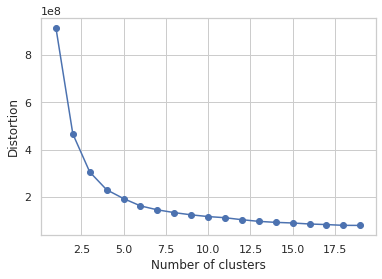

In [173]:
distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42
    )
    km.fit(uso3_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


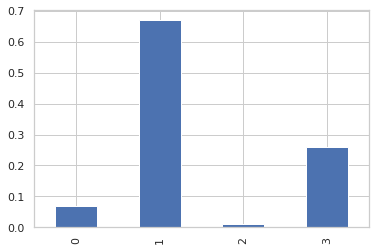

In [174]:
km = KMeans(
        n_clusters=4, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42)

km.fit(uso3_clus)
uso3['cluster']=km.labels_
uso3.cluster.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [175]:
uso3.groupby(['cluster'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster                                                           
0       count    204.000000   204.000000   204.000000   204.000000
        mean    2239.029412   869.637255  1284.504902    84.887255
        std      607.175752   410.033203   411.399791   172.979318
        min     1376.000000   118.000000   689.000000     0.000000
        25%     1752.750000   611.750000   995.250000     1.000000
        50%     2121.000000   791.500000  1174.000000    15.500000
        75%     2532.000000  1067.250000  1467.750000    72.000000
        max     4873.000000  3446.000000  2586.000000  1090.000000
1       count   1888.000000  1888.000000  1888.000000  1888.000000
        mean     260.434322   127.830508   119.265890    13.337924
        std      172.647488    91.613575    90.265382    46.134526
        min        0.000000     0.000000     0.000000     0.000000
        25%      116.000000    54.000000    46.000000     0.000000
        50%      236.500000   109.000000   100.000000     0.000000
        75%      397.000000   185.000000   175.250000     5.000000
        max     1360.000000   485.000000   438.000000   971.000000
2       count     18.000000    18.000000    18.000000    18.000000
        mean    5775.777778  1828.611111  3883.000000    64.166667
        std     1755.157897   857.454244  1701.839351   156.357904
        min     3689.000000   637.000000  2426.000000     0.000000
        25%     4532.250000  1346.500000  2798.750000     1.250000
        50%     5516.000000  1713.000000  3565.000000    11.500000
        75%     6746.750000  2283.250000  4360.500000    29.000000
        max    11259.000000  4240.000000  9872.000000   608.000000
3       count    726.000000   726.000000   726.000000   726.000000
        mean     961.783747   431.152893   486.950413    43.680441
        std      272.514177   176.285560   178.115926    95.594386
        min      559.000000    48.000000    20.000000     0.000000
        25%      738.000000   312.250000   354.250000     0.000000
        50%      905.000000   411.000000   462.500000     4.000000
        75%     1134.750000   520.750000   598.500000    41.000000
        max     1750.000000  1280.000000  1064.000000  1004.000000

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


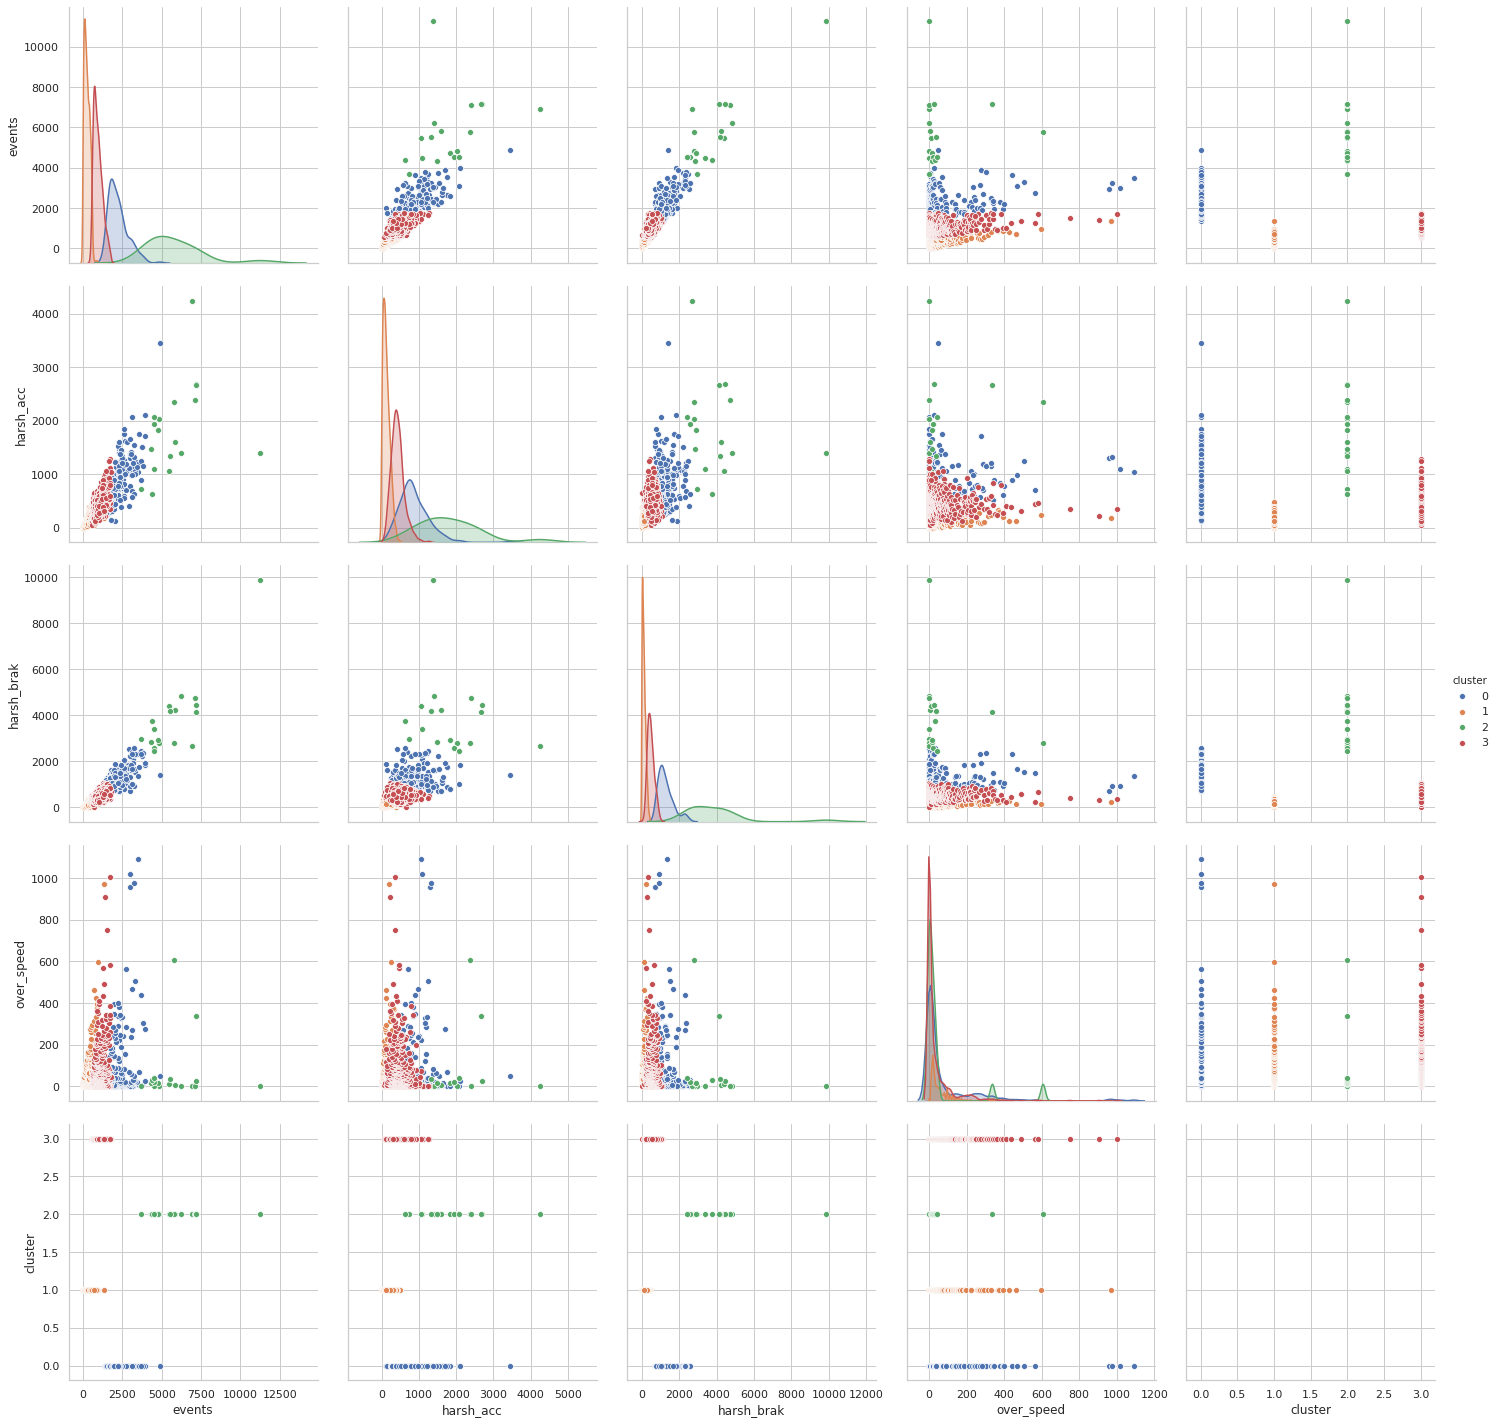

In [176]:
sns.pairplot(uso3[['events','harsh_acc','harsh_brak','over_speed','cluster']],hue='cluster',height=4)

# OPCION 3:

Text(0.5, 1.0, 'Overspeed')

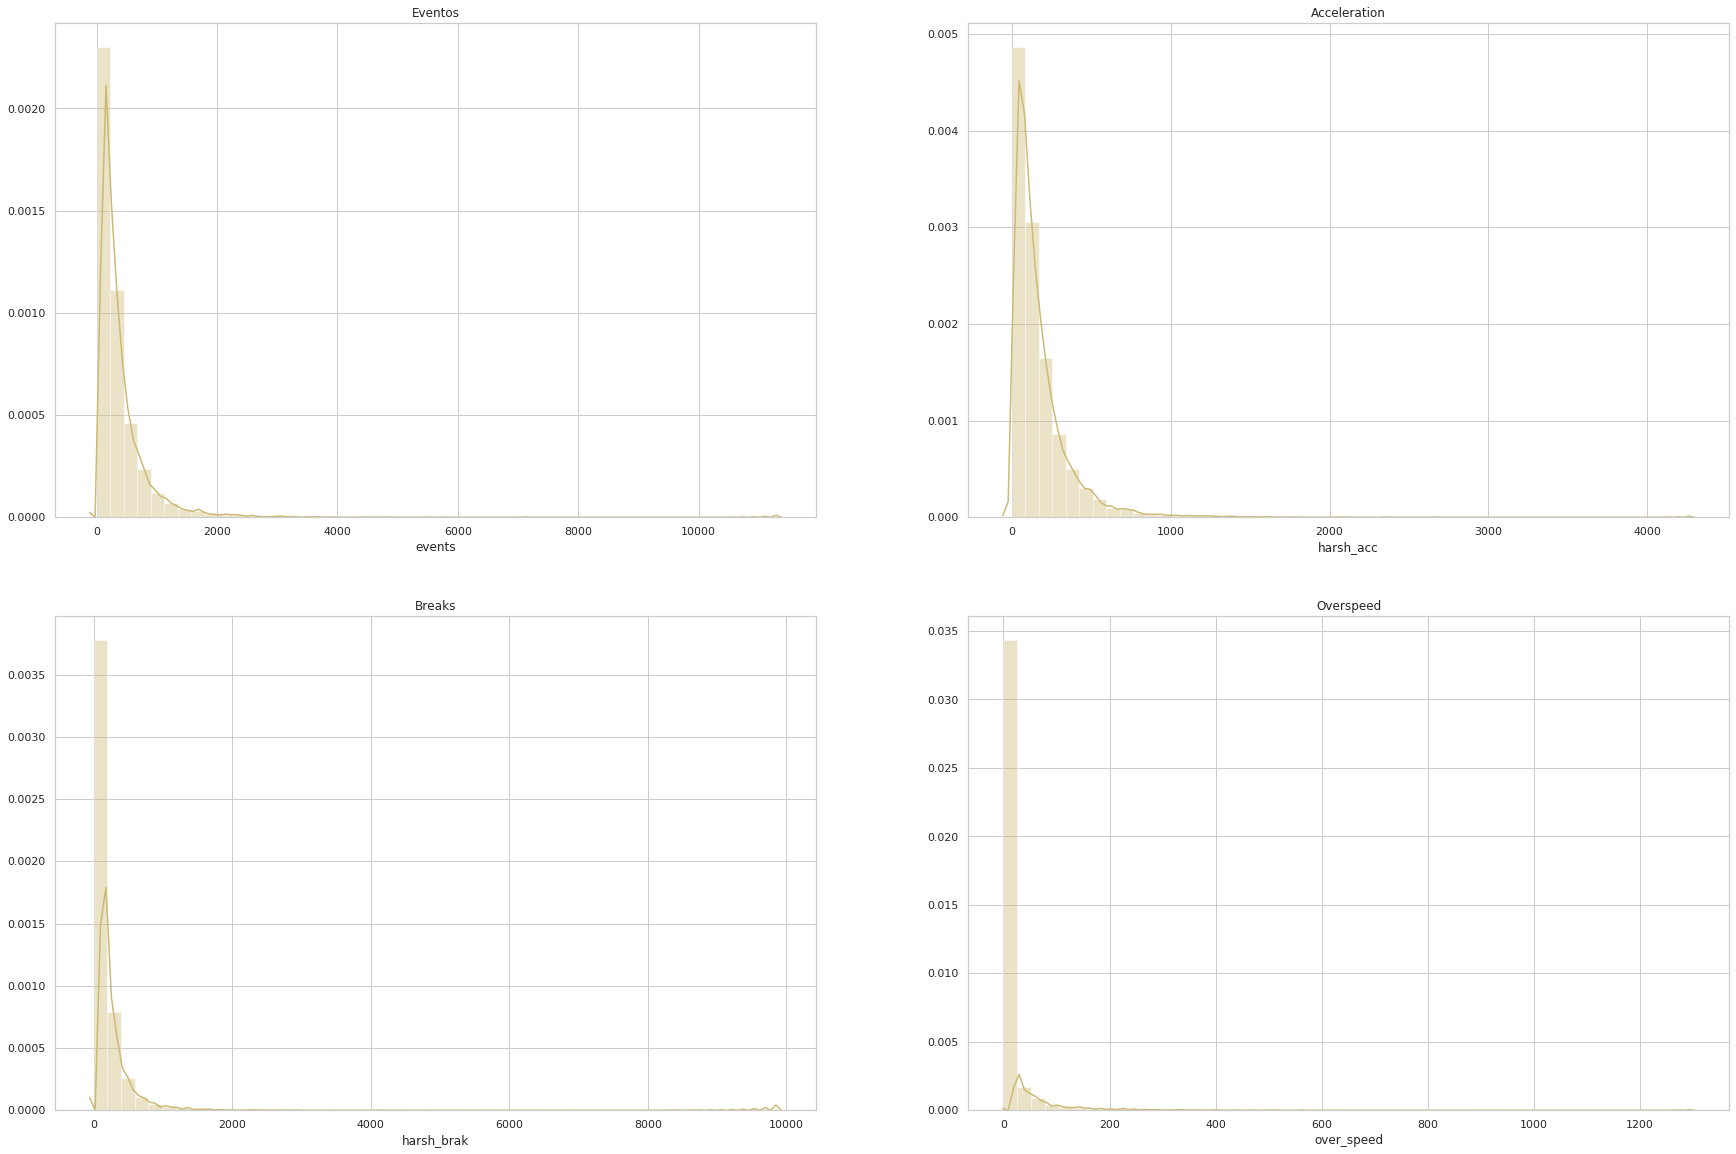

In [179]:
f,ax = plt.subplots(2,2,figsize=(30,20))

sns.distplot(data.events, ax=ax[0,0],color='y');
ax[0,0].set_title('Eventos')

sns.distplot(data.harsh_acc, ax=ax[0,1],color='y');
ax[0,1].set_title('Acceleration')

sns.distplot(data.harsh_brak, ax=ax[1,0],color='y');
ax[1,0].set_title('Breaks')

sns.distplot(data.over_speed, ax=ax[1,1],color='y');
ax[1,1].set_title('Overspeed')

In [180]:
parameters={'init':['k-means++','random'],
           'n_init':[10,50,100],
           'tol':[0.01,0.001,0.0001],
           'n_clusters': np.arange(1,10)}


data_clus=data[['harsh_acc','harsh_brak','over_speed']]


grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(data_clus)
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 20.6min finished


{'init': 'k-means++', 'n_clusters': 9, 'n_init': 100, 'tol': 0.01}

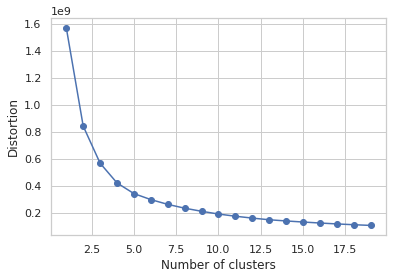

In [181]:
distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=100, max_iter=300,
        tol=0.01, random_state=42
    )
    km.fit(data_clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

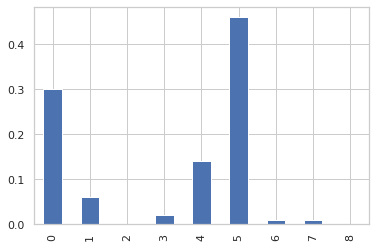

In [202]:
km = KMeans(
        n_clusters=9, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42)

km.fit(data_clus)
data3=data.copy()
data3['cluster3']=km.labels_
data3.cluster3.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [203]:
data3.cluster3.value_counts().round(2).sort_index()#.plot(kind='bar')

0    4209
1     860
2      18
3     257
4    2026
5    6547
6      78
7      89
8       1
Name: cluster3, dtype: int64

In [204]:
data3.groupby(['cluster3'])['events','harsh_acc','harsh_brak','over_speed'].mean().round(2)

,events,harsh_acc,harsh_brak,over_speed
cluster3,,,,
0,301.38,157.22,134.01,10.15
1,1018.47,468.32,505.89,44.27
2,5413.06,1833.33,3495.61,84.11
3,1583.82,561.70,966.20,55.93
4,589.21,277.98,290.14,21.09
5,92.74,48.50,41.38,2.87
6,2756.88,933.58,1719.51,103.79
7,2157.02,1245.43,823.54,88.06
8,11259.00,1387.00,9872.00,0.00


Quedan muchos clusters que se arman para explicar outliers y minimizar errores.
Voy a probar menos clusters, al final los mejores clientes son los que estan acumulados en los mas representativos.

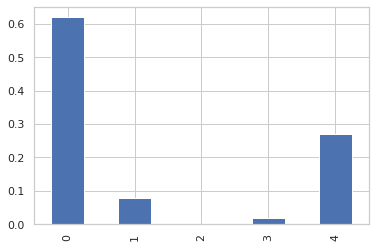

In [200]:
km = KMeans(
        n_clusters=5, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.001, random_state=42)

km.fit(data_clus)
data3=data.copy()
data3['cluster3']=km.labels_
data3.cluster3.value_counts(normalize=True).round(2).sort_index().plot(kind='bar')

In [192]:
data3.cluster3.value_counts().round(2).sort_index()#.plot(kind='bar')

0     663
1    7087
2    4211
3     112
4       1
5      18
6    1818
7     175
Name: cluster3, dtype: int64

In [190]:
data3.cluster3.value_counts().round(2).sort_index()#.plot(kind='bar')

0    6560
1     785
2      53
3     513
4    1647
5       1
6     231
7    4198
8      14
9      83
Name: cluster3, dtype: int64

In [186]:
data3.groupby(['cluster3'])['events','harsh_acc','harsh_brak','over_speed'].mean().round(2)

,events,harsh_acc,harsh_brak,over_speed
cluster3,,,,
0,92.86,49.01,41.03,2.83
1,767.03,259.64,479.00,28.38
2,3061.70,1016.04,1973.92,71.74
3,1154.25,587.74,517.49,49.02
4,581.57,317.79,242.14,21.64
5,11259.00,1387.00,9872.00,0.00
6,1678.65,578.28,1042.64,57.74
7,302.72,151.31,140.92,10.48
8,5739.64,1913.36,3723.79,102.50


In [187]:
data3.groupby(['cluster3'])['events','harsh_acc','harsh_brak','over_speed'].describe().stack()

events    harsh_acc   harsh_brak   over_speed
cluster3                                                          
0        count  6560.000000  6560.000000  6560.000000  6560.000000
         mean     92.864482    49.010976    41.026982     2.826524
         std      57.442392    33.619421    29.722609    11.495537
         min       0.000000     0.000000     0.000000     0.000000
         25%      44.000000    21.000000    17.000000     0.000000
...                     ...          ...          ...          ...
9        min    1576.000000   930.000000   375.000000     0.000000
         25%    2005.500000  1059.000000   750.000000     2.000000
         50%    2299.000000  1205.000000   903.000000    17.000000
         75%    2557.000000  1346.000000  1150.000000    87.000000
         max    4873.000000  3446.000000  1501.000000  1302.000000

[79 rows x 4 columns]

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


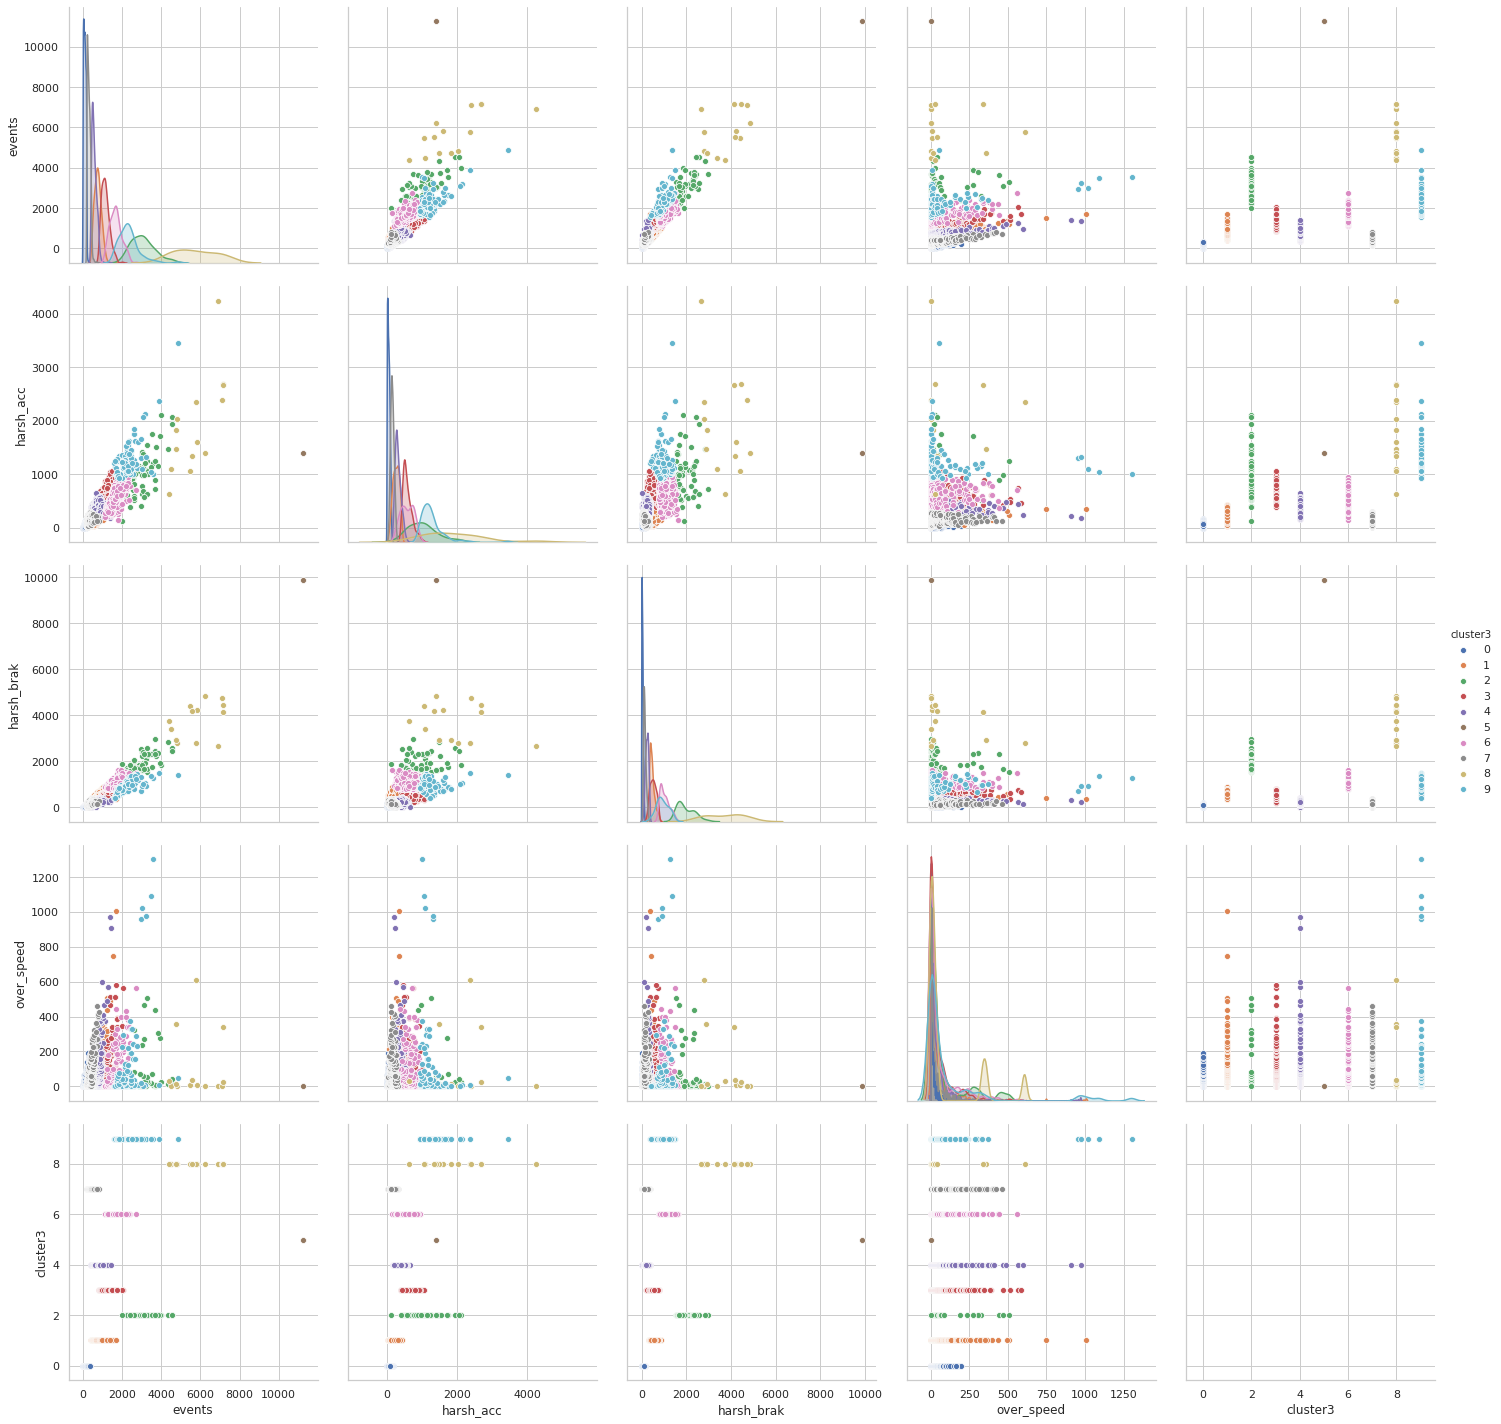

In [188]:
sns.pairplot(data3[['events','harsh_acc','harsh_brak','over_speed','cluster3']],hue='cluster3',height=4)